In [2]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd
import hvplot.pandas
import holoviews as hv
import cartopy.crs as ccrs
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import linear_cmap
import holoviews.plotting.bokeh
from holoviews import opts
from bokeh.models import HoverTool, PrintfTickFormatter
import us

#Import API Keys
from api_key import fbi_cde_key

In [247]:
# Load the Data from Kento's API pull
file_path = "./Resources/state_id.csv"
state_id_df = pd.read_csv(file_path)
pd.DataFrame(state_id_df)
state_id_df.loc[:, ["State_ID"]].head()

State_ID
0       AL
1       AK
2       AS
3       AZ
4       AR

In [248]:
state_id_list = state_id_df["State_ID"].tolist()
print(state_id_list)

['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FM', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MH', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY']


In [4]:
for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2010&to=2020&API_KEY={fbi_cde_key}"
    print(url)

https://api.usa.gov/crime/fbi/cde/arrest/state/AL/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AK/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AS/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AZ/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/AR/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/CA/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/CO/property_crime?from=2010&to=2020&API_KEY=kGOO4QaRWAMh62TLBtCCkP8xsYn7Z5ZBh5s7J2bN
https://api.usa.gov/crime/fbi/cde/arrest/state/CT/property_crime?from=2010&t

In [5]:
data_list = []

for state_id in state_id_list:
    url = f"https://api.usa.gov/crime/fbi/cde/arrest/state/{state_id}/property_crime?from=2010&to=2020&API_KEY={fbi_cde_key}"
    response = requests.get(url).json()

    data = response["data"]
    for data_list_response in data:
        data_list_response ["state "] = state_id
        data_list.append(data_list_response)

data_list

In [7]:
json_data = json.dumps(data_list, indent=4)

file_path = "FBI_Data_Raw_2010_2020.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data)

print(f"API response saved to {file_path}")

API response saved to FBI_Data_Raw_2010_2020.json


In [8]:
# To avoid polling the API again, we can pull the data from the saved JSON.
pull_json = "FBI_Data_Raw_2010_2020.json"

json_response_df = pd.read_json(pull_json)
json_response_df

data_year  Motor Vehicle Theft  Arson  Burglary  Embezzlement  \
0         2010                  658    108      2183           163   
1         2011                    5      0        17            16   
2         2012                    3      0        24            20   
3         2013                    2      1        11            17   
4         2014                   10      1        36            13   
..         ...                  ...    ...       ...           ...   
550       2016                  109     48       233            12   
551       2017                  130     38       217            18   
552       2018                  128     19       243             6   
553       2019                  104     27       229             1   
554       2020                  149     18       211             2   

     Forgery and Counterfeiting  Fraud  Larceny - Theft  Vandalism  \
0                          1178   6370            12691       1878   
1                             4      9              509         10   
2                             6     22              462          4   
3                             7     15              670          6   
4                            18     59              877         15   
..                          ...    ...              ...        ...   
550                          49    197             2194        531   
551                          49    158             1995        493   
552                          36    127             1818        419   
553                          29    112             1562        467   
554                          19     97             1640        502   

     Stolen Property: Buying, Receiving, Possessing state   
0                                              1496     AL  
1                                                20     AL  
2                                                18     AL  
3                                                30     AL  
4                                                36     AL  
..                                              ...    ...  
550                                              43     WY  
551                                              94     WY  
552                                              80     WY  
553                                              55     WY  
554                                              50     WY  

[555 rows x 11 columns]

In [212]:
# Clean the Dataframe
crime_df = json_response_df.rename(columns=
                              {"data_year": "Year",
                               "Motor Vehicle Theft": "Vehicle Theft",
                               "state ": "State",
                               "Stolen Property: Buying, Receiving, Possessing": "Dealing in Stolen Property"
                              })
crime_df

Year  Vehicle Theft  Arson  Burglary  Embezzlement  \
0    2010            658    108      2183           163   
1    2011              5      0        17            16   
2    2012              3      0        24            20   
3    2013              2      1        11            17   
4    2014             10      1        36            13   
..    ...            ...    ...       ...           ...   
550  2016            109     48       233            12   
551  2017            130     38       217            18   
552  2018            128     19       243             6   
553  2019            104     27       229             1   
554  2020            149     18       211             2   

     Forgery and Counterfeiting  Fraud  Larceny - Theft  Vandalism  \
0                          1178   6370            12691       1878   
1                             4      9              509         10   
2                             6     22              462          4   
3                             7     15              670          6   
4                            18     59              877         15   
..                          ...    ...              ...        ...   
550                          49    197             2194        531   
551                          49    158             1995        493   
552                          36    127             1818        419   
553                          29    112             1562        467   
554                          19     97             1640        502   

     Dealing in Stolen Property State  
0                          1496    AL  
1                            20    AL  
2                            18    AL  
3                            30    AL  
4                            36    AL  
..                          ...   ...  
550                          43    WY  
551                          94    WY  
552                          80    WY  
553                          55    WY  
554                          50    WY  

[555 rows x 11 columns]

In [213]:
crime_df_cleaned = crime_df[["Year", 
                        "State", 
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property"
                       ]]
crime_df_cleaned

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  \
0    2010    AL            12691            658    108      2183   
1    2011    AL              509              5      0        17   
2    2012    AL              462              3      0        24   
3    2013    AL              670              2      1        11   
4    2014    AL              877             10      1        36   
..    ...   ...              ...            ...    ...       ...   
550  2016    WY             2194            109     48       233   
551  2017    WY             1995            130     38       217   
552  2018    WY             1818            128     19       243   
553  2019    WY             1562            104     27       229   
554  2020    WY             1640            149     18       211   

     Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0             163                        1178   6370       1878   
1              16                           4      9         10   
2              20                           6     22          4   
3              17                           7     15          6   
4              13                          18     59         15   
..            ...                         ...    ...        ...   
550            12                          49    197        531   
551            18                          49    158        493   
552             6                          36    127        419   
553             1                          29    112        467   
554             2                          19     97        502   

     Dealing in Stolen Property  
0                          1496  
1                            20  
2                            18  
3                            30  
4                            36  
..                          ...  
550                          43  
551                          94  
552                          80  
553                          55  
554                          50  

[555 rows x 11 columns]

In [221]:
census_path = "./Resources/census_data.csv"

census_df = pd.read_csv(census_path)
census_df.head()

State  Population
0    AL     4921532
1    AK      731158
2    AZ     7421401
3    AR     3030522
4    CA    39368078

In [222]:
# Combine the Crime and Census Dataframes
crime_census_combined = crime_df_cleaned.merge(census_df,how="left", on=["State", "State"])
crime_census_combined

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  \
0    2010    AL            12691            658    108      2183   
1    2011    AL              509              5      0        17   
2    2012    AL              462              3      0        24   
3    2013    AL              670              2      1        11   
4    2014    AL              877             10      1        36   
..    ...   ...              ...            ...    ...       ...   
550  2016    WY             2194            109     48       233   
551  2017    WY             1995            130     38       217   
552  2018    WY             1818            128     19       243   
553  2019    WY             1562            104     27       229   
554  2020    WY             1640            149     18       211   

     Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0             163                        1178   6370       1878   
1              16                           4      9         10   
2              20                           6     22          4   
3              17                           7     15          6   
4              13                          18     59         15   
..            ...                         ...    ...        ...   
550            12                          49    197        531   
551            18                          49    158        493   
552             6                          36    127        419   
553             1                          29    112        467   
554             2                          19     97        502   

     Dealing in Stolen Property  Population  
0                          1496   4921532.0  
1                            20   4921532.0  
2                            18   4921532.0  
3                            30   4921532.0  
4                            36   4921532.0  
..                          ...         ...  
550                          43    582328.0  
551                          94    582328.0  
552                          80    582328.0  
553                          55    582328.0  
554                          50    582328.0  

[555 rows x 12 columns]

In [268]:
# Add the crime columns together in each row to crete a "Total Arrests" column
crime_census_combined["Total Arrests"] = crime_census_combined["Larceny - Theft"] + crime_census_combined["Vehicle Theft"] + crime_census_combined["Arson"] + crime_census_combined["Burglary"] + crime_census_combined["Embezzlement"] + crime_census_combined["Forgery and Counterfeiting"] + crime_census_combined["Fraud"] + crime_census_combined["Vandalism"] + crime_census_combined["Dealing in Stolen Property"]
crime_census_combined

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  \
0    2010    AL            12691            658    108      2183   
1    2011    AL              509              5      0        17   
2    2012    AL              462              3      0        24   
3    2013    AL              670              2      1        11   
4    2014    AL              877             10      1        36   
..    ...   ...              ...            ...    ...       ...   
550  2016    WY             2194            109     48       233   
551  2017    WY             1995            130     38       217   
552  2018    WY             1818            128     19       243   
553  2019    WY             1562            104     27       229   
554  2020    WY             1640            149     18       211   

     Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0             163                        1178   6370       1878   
1              16                           4      9         10   
2              20                           6     22          4   
3              17                           7     15          6   
4              13                          18     59         15   
..            ...                         ...    ...        ...   
550            12                          49    197        531   
551            18                          49    158        493   
552             6                          36    127        419   
553             1                          29    112        467   
554             2                          19     97        502   

     Dealing in Stolen Property  Population  Total Arrests State Name  \
0                          1496   4921532.0          26725    Alabama   
1                            20   4921532.0            590    Alabama   
2                            18   4921532.0            559    Alabama   
3                            30   4921532.0            759    Alabama   
4                            36   4921532.0           1065    Alabama   
..                          ...         ...            ...        ...   
550                          43    582328.0           3416    Wyoming   
551                          94    582328.0           3192    Wyoming   
552                          80    582328.0           2876    Wyoming   
553                          55    582328.0           2586    Wyoming   
554                          50    582328.0           2688    Wyoming   

     Arrests per Capita  
0            543.021970  
1             11.988137  
2             11.358252  
3             15.422027  
4             21.639603  
..                  ...  
550          586.610982  
551          548.144688  
552          493.879738  
553          444.079625  
554          461.595527  

[555 rows x 15 columns]

In [276]:
# state_id.csv has already been loaded, but loading it again. To use as a key to add in full state names to crime_census_combined.
state_id_path = "./Resources/state_id.csv"
state_id_df2 = pd.read_csv(state_id_path)
pd.DataFrame(state_id_df2)

state_id_df2 = state_id_df.rename(columns={'State_ID': 'State', 'State': 'State Name'})

State                      State Name
0     AL                         Alabama
1     AK                          Alaska
2     AS                  American Samoa
3     AZ                         Arizona
4     AR                        Arkansas
5     CA                      California
6     CO                        Colorado
7     CT                     Connecticut
8     DE                        Delaware
9     DC            District Of Columbia
10    FM  Federated States Of Micronesia
11    FL                         Florida
12    GA                         Georgia
13    GU                            Guam
14    HI                          Hawaii
15    ID                           Idaho
16    IL                        Illinois
17    IN                         Indiana
18    IA                            Iowa
19    KS                          Kansas
20    KY                        Kentucky
21    LA                       Louisiana
22    ME                           Maine
23    MH                Marshall Islands
24    MD                        Maryland
25    MA                   Massachusetts
26    MI                        Michigan
27    MN                       Minnesota
28    MS                     Mississippi
29    MO                        Missouri
30    MT                         Montana
31    NE                        Nebraska
32    NV                          Nevada
33    NH                   New Hampshire
34    NJ                      New Jersey
35    NM                      New Mexico
36    NY                        New York
37    NC                  North Carolina
38    ND                    North Dakota
39    MP        Northern Mariana Islands
40    OH                            Ohio
41    OK                        Oklahoma
42    OR                          Oregon
43    PW                           Palau
44    PA                    Pennsylvania
45    PR                     Puerto Rico
46    RI                    Rhode Island
47    SC                  South Carolina
48    SD                    South Dakota
49    TN                       Tennessee
50    TX                           Texas
51    UT                            Utah
52    VT                         Vermont
53    VI                  Virgin Islands
54    VA                        Virginia
55    WA                      Washington
56    WV                   West Virginia
57    WI                       Wisconsin
58    WY                         Wyoming

In [279]:
merged_df

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  \
0    2010    AL            12691            658    108      2183   
1    2011    AL              509              5      0        17   
2    2012    AL              462              3      0        24   
3    2013    AL              670              2      1        11   
4    2014    AL              877             10      1        36   
..    ...   ...              ...            ...    ...       ...   
550  2016    WY             2194            109     48       233   
551  2017    WY             1995            130     38       217   
552  2018    WY             1818            128     19       243   
553  2019    WY             1562            104     27       229   
554  2020    WY             1640            149     18       211   

     Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0             163                        1178   6370       1878   
1              16                           4      9         10   
2              20                           6     22          4   
3              17                           7     15          6   
4              13                          18     59         15   
..            ...                         ...    ...        ...   
550            12                          49    197        531   
551            18                          49    158        493   
552             6                          36    127        419   
553             1                          29    112        467   
554             2                          19     97        502   

     Dealing in Stolen Property  Population  Total Arrests  Arrests per Capita  
0                          1496   4921532.0          26725          543.021970  
1                            20   4921532.0            590           11.988137  
2                            18   4921532.0            559           11.358252  
3                            30   4921532.0            759           15.422027  
4                            36   4921532.0           1065           21.639603  
..                          ...         ...            ...                 ...  
550                          43    582328.0           3416          586.610982  
551                          94    582328.0           3192          548.144688  
552                          80    582328.0           2876          493.879738  
553                          55    582328.0           2586          444.079625  
554                          50    582328.0           2688          461.595527  

[555 rows x 14 columns]

In [286]:
# STOP!
# DO NOT RUN THIS AGAIN - IT ADDS ANOTHER COLUMN THAT WE WILL THEN HAVE TO CORRECT. :)
# Instead, skip down a bit and load the combined_cleaned.csv. 
# Adding a Column with Full State names, not just abbreviations

if 'State Name' not in merged_df.columns:
    state_id_df2 = state_id_df.rename(columns={'State_ID': 'State', 'State': 'State Name'})
    merged_df = crime_census_combined.merge(state_id_df2, on='State', how='left')

merged_df

# Just in Case
# merged_df = merged_df.drop(columns=["State Name_x"])
# merged_df = merged_df.rename(columns={'State Name_y': 'State Name'})

Year State  Larceny - Theft  Vehicle Theft  Arson  Burglary  \
0    2010    AL            12691            658    108      2183   
1    2011    AL              509              5      0        17   
2    2012    AL              462              3      0        24   
3    2013    AL              670              2      1        11   
4    2014    AL              877             10      1        36   
..    ...   ...              ...            ...    ...       ...   
550  2016    WY             2194            109     48       233   
551  2017    WY             1995            130     38       217   
552  2018    WY             1818            128     19       243   
553  2019    WY             1562            104     27       229   
554  2020    WY             1640            149     18       211   

     Embezzlement  Forgery and Counterfeiting  Fraud  Vandalism  \
0             163                        1178   6370       1878   
1              16                           4      9         10   
2              20                           6     22          4   
3              17                           7     15          6   
4              13                          18     59         15   
..            ...                         ...    ...        ...   
550            12                          49    197        531   
551            18                          49    158        493   
552             6                          36    127        419   
553             1                          29    112        467   
554             2                          19     97        502   

     Dealing in Stolen Property  Population  Total Arrests State Name_x  \
0                          1496   4921532.0          26725      Alabama   
1                            20   4921532.0            590      Alabama   
2                            18   4921532.0            559      Alabama   
3                            30   4921532.0            759      Alabama   
4                            36   4921532.0           1065      Alabama   
..                          ...         ...            ...          ...   
550                          43    582328.0           3416      Wyoming   
551                          94    582328.0           3192      Wyoming   
552                          80    582328.0           2876      Wyoming   
553                          55    582328.0           2586      Wyoming   
554                          50    582328.0           2688      Wyoming   

     Arrests per Capita State Name_y  
0            543.021970      Alabama  
1             11.988137      Alabama  
2             11.358252      Alabama  
3             15.422027      Alabama  
4             21.639603      Alabama  
..                  ...          ...  
550          586.610982      Wyoming  
551          548.144688      Wyoming  
552          493.879738      Wyoming  
553          444.079625      Wyoming  
554          461.595527      Wyoming  

[555 rows x 16 columns]

In [292]:
# Getting a Per Capita (100,000) calculation for the "crime" rate.
# Calculation is # of Arrests / Population, multiplied by 100,000.

raw_crime_rate = merged_df["Total Arrests"] / merged_df["Population"]
merged_df["Arrests per Capita"] = raw_crime_rate * 100000

In [364]:
# Put Total Arrests near the front of the dataframe
combined_almost_cleaned = merged_df[["Year", 
                        "State",
                        "State Name",
                        "Population",
                        "Total Arrests",
                        "Arrests per Capita",
                        "Larceny - Theft",
                        "Vehicle Theft", 
                        "Arson", 
                        "Burglary", 
                        "Embezzlement", 
                        "Forgery and Counterfeiting", 
                        "Fraud", 
                        "Vandalism",
                        "Dealing in Stolen Property",
                       ]]
combined_almost_cleaned

Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
550  2016    WY    Wyoming    582328.0           3416          586.610982   
551  2017    WY    Wyoming    582328.0           3192          548.144688   
552  2018    WY    Wyoming    582328.0           2876          493.879738   
553  2019    WY    Wyoming    582328.0           2586          444.079625   
554  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
0              12691            658    108      2183           163   
1                509              5      0        17            16   
2                462              3      0        24            20   
3                670              2      1        11            17   
4                877             10      1        36            13   
..               ...            ...    ...       ...           ...   
550             2194            109     48       233            12   
551             1995            130     38       217            18   
552             1818            128     19       243             6   
553             1562            104     27       229             1   
554             1640            149     18       211             2   

     Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  
0                          1178   6370       1878                        1496  
1                             4      9         10                          20  
2                             6     22          4                          18  
3                             7     15          6                          30  
4                            18     59         15                          36  
..                          ...    ...        ...                         ...  
550                          49    197        531                          43  
551                          49    158        493                          94  
552                          36    127        419                          80  
553                          29    112        467                          55  
554                          19     97        502                          50  

[555 rows x 15 columns]

In [362]:
# Find NaNs
# I checked the data. The NAN was the the US Virgin islands, which was outside our scope.
nan_counts = combined_almost_cleaned.isna().sum()
nan_counts

Year                          0
State                         0
State Name                    0
Population                    1
Total Arrests                 0
Arrests per Capita            1
Larceny - Theft               0
Vehicle Theft                 0
Arson                         0
Burglary                      0
Embezzlement                  0
Forgery and Counterfeiting    0
Fraud                         0
Vandalism                     0
Dealing in Stolen Property    0
dtype: int64

In [368]:
# Remove NaNs
combined_cleaned = combined_almost_cleaned.dropna()
combined_cleaned

Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
550  2016    WY    Wyoming    582328.0           3416          586.610982   
551  2017    WY    Wyoming    582328.0           3192          548.144688   
552  2018    WY    Wyoming    582328.0           2876          493.879738   
553  2019    WY    Wyoming    582328.0           2586          444.079625   
554  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
0              12691            658    108      2183           163   
1                509              5      0        17            16   
2                462              3      0        24            20   
3                670              2      1        11            17   
4                877             10      1        36            13   
..               ...            ...    ...       ...           ...   
550             2194            109     48       233            12   
551             1995            130     38       217            18   
552             1818            128     19       243             6   
553             1562            104     27       229             1   
554             1640            149     18       211             2   

     Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  
0                          1178   6370       1878                        1496  
1                             4      9         10                          20  
2                             6     22          4                          18  
3                             7     15          6                          30  
4                            18     59         15                          36  
..                          ...    ...        ...                         ...  
550                          49    197        531                          43  
551                          49    158        493                          94  
552                          36    127        419                          80  
553                          29    112        467                          55  
554                          19     97        502                          50  

[554 rows x 15 columns]

In [23]:
# Exporting Cleaned Dataframe to CSV
combined_cleaned.to_csv('./Resources/combined_cleaned.csv', index=False)

In [3]:
# Load from the CSV to skip all those steps above
combined_cleaned = pd.read_csv('./Resources/combined_cleaned.csv')
combined_cleaned

Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
549  2016    WY    Wyoming    582328.0           3416          586.610982   
550  2017    WY    Wyoming    582328.0           3192          548.144688   
551  2018    WY    Wyoming    582328.0           2876          493.879738   
552  2019    WY    Wyoming    582328.0           2586          444.079625   
553  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
0              12691            658    108      2183           163   
1                509              5      0        17            16   
2                462              3      0        24            20   
3                670              2      1        11            17   
4                877             10      1        36            13   
..               ...            ...    ...       ...           ...   
549             2194            109     48       233            12   
550             1995            130     38       217            18   
551             1818            128     19       243             6   
552             1562            104     27       229             1   
553             1640            149     18       211             2   

     Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  
0                          1178   6370       1878                        1496  
1                             4      9         10                          20  
2                             6     22          4                          18  
3                             7     15          6                          30  
4                            18     59         15                          36  
..                          ...    ...        ...                         ...  
549                          49    197        531                          43  
550                          49    158        493                          94  
551                          36    127        419                          80  
552                          29    112        467                          55  
553                          19     97        502                          50  

[554 rows x 15 columns]

In [4]:
# Factoids

# Average Arrests Per Capita throughout the US
average_nat_crime = combined_cleaned["Arrests per Capita"].mean()
average_nat_crime

536.3431037470057

In [5]:
#State with the highest arrest rate per capita.
max_arrest_pc = combined_cleaned[combined_cleaned['Arrests per Capita'] == combined_cleaned['Arrests per Capita'].max()]
print(max_arrest_pc[['Year', 'State Name', 'Arrests per Capita']])

    Year State Name  Arrests per Capita
79  2012   Delaware         1214.014059


In [8]:
# Group the DataFrame by 'State' and calculate the mean of 'Arrests per Capita' for each state
average_arrests_per_capita = combined_cleaned.groupby('State')['Arrests per Capita'].mean()

# Reset the index to get the 'State' column back
average_arrests_per_capita = average_arrests_per_capita.reset_index()

# Rename the columns for clarity
average_arrests_per_capita.columns = ['State', 'Average Arrests Per Capita']

# Print or use the resulting DataFrame as needed
print(average_arrests_per_capita)

   State  Average Arrests Per Capita
0     AK                  666.725685
1     AL                  300.477390
2     AR                  668.606686
3     AZ                  699.885005
4     CA                  431.351559
5     CO                  632.900643
6     CT                  534.847157
7     DC                   30.202870
8     DE                 1031.239443
9     FL                  354.832020
10    GA                  500.836146
11    HI                  370.186442
12    IA                  546.421063
13    ID                  436.060970
14    IL                  125.011889
15    IN                  410.348054
16    KS                  313.460797
17    KY                  556.106252
18    LA                  732.185905
19    MA                  313.848283
20    MD                  475.131122
21    ME                  645.878670
22    MI                  386.427863
23    MN                  632.804400
24    MO                  738.525120
25    MS                  426.295416
2

In [13]:
# Find the state with the highest average arrests per capita
highest_avg_arrests_per_capita_state = average_arrests_per_capita.loc[average_arrests_per_capita['Average Arrests Per Capita'].idxmax()]

print("State with the Highest Average Arrests Per Capita:")
print(highest_avg_arrests_per_capita_state)

State with the Highest Average Arrests Per Capita:
State                                  DE
Average Arrests Per Capita    1031.239443
Name: 8, dtype: object


In [14]:
# Find the three states with the highest average arrests per capita
highest_avg_arrests_per_capita_states = average_arrests_per_capita.nlargest(3, 'Average Arrests Per Capita')

print("States with the highest Average Arrests Per Capita:")
print(highest_avg_arrests_per_capita_states)

States with the highest Average Arrests Per Capita:
   State  Average Arrests Per Capita
8     DE                 1031.239443
42    TN                  832.498913
48    WI                  757.612255


In [6]:
#State with the lowest arrest rate per capita.
min_arrest_pc = combined_cleaned[combined_cleaned['Arrests per Capita'] == combined_cleaned['Arrests per Capita'].min()]
print(min_arrest_pc[['Year', 'State Name', 'Arrests per Capita']])

     Year    State Name  Arrests per Capita
421  2020  Pennsylvania            3.496762


In [15]:
# Find the state with the lowest average arrests per capita
lowest_avg_arrests_per_capita_state = average_arrests_per_capita.loc[average_arrests_per_capita['Average Arrests Per Capita'].idxmin()]

print("State with the Lowest Average Arrests Per Capita:")
print(lowest_avg_arrests_per_capita_state)

State with the Lowest Average Arrests Per Capita:
State                               DC
Average Arrests Per Capita    30.20287
Name: 7, dtype: object


In [16]:
# Find the three states with the lowest average arrests per capita
lowest_avg_arrests_per_capita_states = average_arrests_per_capita.nsmallest(3, 'Average Arrests Per Capita')

print("States with the Lowest Average Arrests Per Capita:")
print(lowest_avg_arrests_per_capita_states)

States with the Lowest Average Arrests Per Capita:
   State  Average Arrests Per Capita
7     DC                   30.202870
14    IL                  125.011889
1     AL                  300.477390


In [18]:
# Aggregate the offenses
offenses_counts = combined_cleaned[['Larceny - Theft', 'Vehicle Theft', 'Arson', 'Burglary', 'Embezzlement', 'Forgery and Counterfeiting', 'Fraud', 'Vandalism', 'Dealing in Stolen Property']].sum()

# Sort by Descending
offense_counts_sorted = offenses_counts.sort_values(ascending=False)

print(offense_counts_sorted)

Larceny - Theft               9822945
Burglary                      2043734
Vandalism                     1808347
Fraud                         1236711
Dealing in Stolen Property     828569
Vehicle Theft                  722168
Forgery and Counterfeiting     513839
Embezzlement                   137282
Arson                           89048
dtype: int64


In [21]:
# Calculate offense percentages for each state
offense_columns = ['Larceny - Theft', 'Vehicle Theft', 'Burglary', 'Vandalism', 'Fraud', 'Dealing in Stolen Property', 'Forgery and Counterfeiting', 'Embezzlement', 'Arson']

for offense in offense_columns:
    combined_cleaned[f'{offense} (%)'] = (combined_cleaned[offense] / combined_cleaned.groupby(['Year'])[offense].transform('sum')) * 100

print(combined_cleaned)

     Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
549  2016    WY    Wyoming    582328.0           3416          586.610982   
550  2017    WY    Wyoming    582328.0           3192          548.144688   
551  2018    WY    Wyoming    582328.0           2876          493.879738   
552  2019    WY    Wyoming    582328.0           2586          444.079625   
553  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  ...  \
0             

In [22]:
combined_cleaned

Year State State Name  Population  Total Arrests  Arrests per Capita  \
0    2010    AL    Alabama   4921532.0          26725          543.021970   
1    2011    AL    Alabama   4921532.0            590           11.988137   
2    2012    AL    Alabama   4921532.0            559           11.358252   
3    2013    AL    Alabama   4921532.0            759           15.422027   
4    2014    AL    Alabama   4921532.0           1065           21.639603   
..    ...   ...        ...         ...            ...                 ...   
549  2016    WY    Wyoming    582328.0           3416          586.610982   
550  2017    WY    Wyoming    582328.0           3192          548.144688   
551  2018    WY    Wyoming    582328.0           2876          493.879738   
552  2019    WY    Wyoming    582328.0           2586          444.079625   
553  2020    WY    Wyoming    582328.0           2688          461.595527   

     Larceny - Theft  Vehicle Theft  Arson  Burglary  ...  \
0              12691            658    108      2183  ...   
1                509              5      0        17  ...   
2                462              3      0        24  ...   
3                670              2      1        11  ...   
4                877             10      1        36  ...   
..               ...            ...    ...       ...  ...   
549             2194            109     48       233  ...   
550             1995            130     38       217  ...   
551             1818            128     19       243  ...   
552             1562            104     27       229  ...   
553             1640            149     18       211  ...   

     Dealing in Stolen Property  Larceny - Theft (%)  Vehicle Theft (%)  \
0                          1496             1.236368           1.151155   
1                            20             0.049662           0.009465   
2                            18             0.044076           0.005362   
3                            30             0.065156           0.002737   
4                            36             0.086856           0.018162   
..                          ...                  ...                ...   
549                          43             0.248381           0.154207   
550                          94             0.233248           0.158255   
551                          80             0.242156           0.171444   
552                          55             0.212294           0.146191   
553                          50             0.322723           0.222073   

     Burglary (%)  Vandalism (%)  Fraud (%)  Dealing in Stolen Property (%)  \
0        0.934627       0.927169   4.188612                        1.966144   
1        0.007218       0.005242   0.006818                        0.026895   
2        0.010390       0.002165   0.017635                        0.022630   
3        0.005343       0.003662   0.013030                        0.039689   
4        0.018746       0.009393   0.052092                        0.050209   
..            ...            ...        ...                             ...   
549      0.134609       0.326552   0.181761                        0.054454   
550      0.120212       0.303426   0.137844                        0.113394   
551      0.162911       0.280523   0.124868                        0.101541   
552      0.156405       0.320339   0.111406                        0.075476   
553      0.175450       0.382622   0.149557                        0.076153   

     Forgery and Counterfeiting (%)  Embezzlement (%)  Arson (%)  
0                          1.894012          1.217599   1.187596  
1                          0.007130          0.124426   0.000000  
2                          0.011021          0.155848   0.000000  
3                          0.014158          0.131957   0.011745  
4                          0.039261          0.099632   0.013179  
..                              ...               ...        ...  
549                        0

In [19]:
# Some factoids for audience participation
# Arson Stats
arson_max_index = combined_cleaned["Arson"].idxmax()
max_arsons = combined_cleaned.loc[arson_max_index, "Arson"]

state_max_arson = combined_cleaned.loc[arson_max_index, "State Name"]

print(f"The state with the greatest number of arsons (where an arrest was made) is: {state_max_arson}, with {max_arsons} firebugs nabbed between 2010 and 2020.")

The state with the greatest number of arsons (where an arrest was made) is: California, with 2051 firebugs nabbed between 2010 and 2020.


In [302]:
# Larceny Stats
larceny_max_index = combined_cleaned["Larceny - Theft"].idxmax()
max_larceny = combined_cleaned.loc[larceny_max_index, "Larceny - Theft"]

state_max_larceny = combined_cleaned.loc[larceny_max_index, "State Name"]

print(f"The state with the most arrests for Larceny (theft of property) is: {state_max_larceny}, with {max_larceny} arrests between 2010 and 2020.")

The state with the most arrests for Larceny (theft of property) is: Texas, with 115252 arrests between 2010 and 2020.


In [303]:
# Embezzlement Stats (Stealing from charities, companies, or from people with a special trust)
embezzlement_max_index = combined_cleaned["Embezzlement"].idxmax()
max_embezzlement = combined_cleaned.loc[embezzlement_max_index, "Embezzlement"]

state_max_embezzlement = combined_cleaned.loc[embezzlement_max_index, "State Name"]

print(f"The state with the most arrests for Embezzlement (stealing from employers, charities, or others with a special trust) is: {state_max_embezzlement}, with {max_embezzlement} arrests between 2010 and 2020.")

The state with the most arrests for Embezzlement (stealing from employers, charities, or others with a special trust) is: Virginia, with 1676 arrests between 2010 and 2020.


In [304]:
# Forgery & Counterfeiting (Phoney Money, Fake IDs)
fnc_max_index = combined_cleaned["Forgery and Counterfeiting"].idxmax()
max_fnc = combined_cleaned.loc[fnc_max_index, "Forgery and Counterfeiting"]

state_max_fnc = combined_cleaned.loc[fnc_max_index, "State Name"]

print(f"The state with the most arrests for making fake paper is: {state_max_fnc}, with {max_fnc} arrests between 2010 and 2020.")

The state with the most arrests for making fake paper is: California, with 7054 arrests between 2010 and 2020.


In [305]:
# Fraud (lying for financial or personal gain)
fraud_max_index = combined_cleaned["Fraud"].idxmax()
max_fraud = combined_cleaned.loc[fraud_max_index, "Fraud"]

state_max_fraud = combined_cleaned.loc[fraud_max_index, "State Name"]

print(f"The state with the most arrests for stealing with words is: {state_max_fraud}, with {max_fraud} arrests between 2010 and 2020.")

The state with the most arrests for stealing with words is: North Carolina, with 18242 arrests between 2010 and 2020.


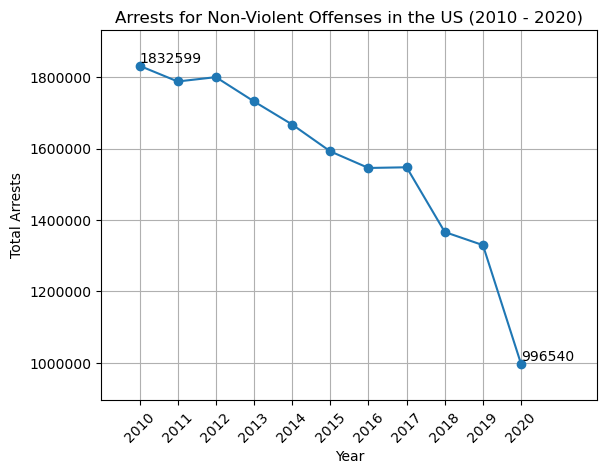

In [47]:
# Use the National Data to show the arrests rate over time

national_total = combined_cleaned.groupby("Year")["Total Arrests"].sum().reset_index()

plt.plot(national_total["Year"], national_total["Total Arrests"], marker="o")

plt.title("Arrests for Non-Violent Offenses in the US (2010 - 2020)")
plt.xlabel("Year")
plt.ylabel("Total Arrests")

plt.xticks(national_total["Year"])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Labels are running together, only showing the first and last values
for i, (x, y) in enumerate(zip(national_total["Year"], national_total["Total Arrests"])):
    if i == 0 or i == len(national_total["Year"]) - 1: 
        plt.text(x, y, f'{y}', ha='left', va='bottom')

plt.ylim(min(national_total["Total Arrests"]) - 100000, max(national_total["Total Arrests"]) + 100000)
plt.xlim(min(national_total["Year"]) - 1, max(national_total["Year"]) + 2)

plt.grid(True)
plt.show()


In [307]:
# Isolate Crime Data by year for later graphs.
# 2017
crime_df_2017 = combined_cleaned[combined_cleaned["Year"] == 2017]
crime_df_2017.head()

Year State  State Name  Population  Total Arrests  Arrests per Capita  \
7   2017    AL     Alabama   4921532.0          25436          516.830938   
18  2017    AK      Alaska    731158.0           5213          712.978590   
29  2017    AZ     Arizona   7421401.0          52895          712.736045   
40  2017    AR    Arkansas   3030522.0          17981          593.330126   
51  2017    CA  California  39368078.0         153175          389.084273   

    Larceny - Theft  Vehicle Theft  Arson  Burglary  Embezzlement  \
7             13959            877    104      2880           152   
18             2356            694     22       623            77   
29            30433           1735    232      4251           457   
40             9975            623     40      2138            60   
51            47080          19541   1573     38214           997   

    Forgery and Counterfeiting  Fraud  Vandalism  Dealing in Stolen Property  
7                         1109   2819       1256                        2280  
18                         113    219       1004                         105  
29                        1219   2142      10974                        1452  
40                         859    918       1574                        1794  
51                        4449   6936      16962                       17423

In [353]:
# HVPLOT maps
# Create a dataframe for the first map.
# Create a Dataframe for each state's average TOTAL ARRESTS from 2010 to 2020.
state_avg = combined_cleaned.groupby("State Name")['Total Arrests'].mean().reset_index()
state_avg.columns = ['State', 'Average Total Arrests']
state_avg = state_avg.dropna()
state_avg.head()

State  Average Total Arrests
0     Alabama           14788.090909
1      Alaska            4874.818182
2     Arizona           51941.272727
3    Arkansas           20262.272727
4  California          169814.818182

In [354]:
state_avg.to_csv('state_avg.csv', index=False)

In [341]:
# Dataframe for the second map.
# Create a Dataframe for each state's average arrests PER CAPITA from 2010 to 2020.  
state_avg_pc = combined_cleaned.groupby("State Name")['Arrests per Capita'].mean().reset_index()
state_avg_pc.columns = ['State', 'Average Arrests per Capita']
state_avg_pc = state_avg_pc.dropna()
state_avg_pc.head()

State  Average Arrests per Capita
0     Alabama                  300.477390
1      Alaska                  666.725685
2     Arizona                  699.885005
3    Arkansas                  668.606686
4  California                  431.351559

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
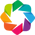

:Polygons   [Longitude,Latitude]   (Average Total Arrests,State)

In [352]:
# Create a Map Illustrating average TOTAL Arrests from 2010 to 2020
# Importing the GeoJSON Map
gdf = gpd.read_file('./Resources/gz_2010_us_040_00_500k.json')

# Applying the state average arrests per capita information to the map
merged_gdf = gdf.merge(state_avg, left_on="NAME", right_on="State")

# Calibrating the display settings
cmap = 'RdYlGn_r'
color_mapping = dict(cmap=cmap, colorbar=True, clabel='Average Total Arrests')

map_plot = merged_gdf.hvplot(
    geo=True,
    hover_cols=['Average Total Arrests', 'State'],
    c='Average Total Arrests',
    title="Average Total Arrests in the US (2010 - 2020)",
    projection=ccrs.PlateCarree(),
    width=1000,
    height=600,
    **color_mapping
)

# Format to remove scientific notation from the map
# merged_gdf["Average Total Arrests"] = merged_gdf["Average Total Arrests"].apply(lambda x: float(f"{x:.2f}"))

# Displaying the map
hv.extension('bokeh')
map_plot

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
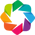

:Polygons   [Longitude,Latitude]   (Average Arrests per Capita,State)

In [351]:
# Create a Map Illustrating average Arrests PER CAPITA from 2010 to 2020
gdf2 = gpd.read_file('./Resources/gz_2010_us_040_00_500k.json')

# Applying the state average arrests per capita information to the map
merged_gdf2 = gdf2.merge(state_avg_pc, left_on="NAME", right_on="State")

# Calibrating the display settings
cmap2 = 'RdYlGn_r'
color_mapping2 = dict(cmap=cmap, colorbar=True, clabel='Average Arrests per Capita')

map_plot2 = merged_gdf2.hvplot(
    geo=True,
    hover_cols=['Average Arrests per Capita', 'State'],
    c='Average Arrests per Capita',
    title="Average Arrests per Capita in the US (2010 - 2020)",
    projection=ccrs.PlateCarree(),
    width=1000,
    height=600,
    **color_mapping2
)

# # Format to remove scientific notation from the map
# merged_gdf2["Average Arrests per Capita"] = merged_gdf2["Average Arrests per Capita"].apply(lambda x: f"{x:.2f}")


# Displaying the map
hv.extension('bokeh')
map_plot2

In [49]:
# Reporting Agencies - We wanted to see if the number of agencies reporting to our datasource changed over time to see if that would explain the trends we are seeing.  If the variation is significant, then it should be noted in our findings.

pull_json2 = "./Resources/reporting_agencies.json"

json_response2_df = pd.read_json(pull_json2)
json_response2_df


data_year  population  total_agency_count  published_agency_count  \
0        2010   308745538               18145                   16478   
1        2011   311591917               18241                   16517   
2        2012   313914040               18295                   16651   
3        2013   316128839               18381                   16698   
4        2014   318857056               18492                   16700   
5        2015   321418820               18433                   16900   
6        2016   323127513               18453                   16995   
7        2017   329056355               18444                   16822   
8        2018   330362587               18556                   16879   
9        2019   331433049               18663                   16834   
10       2020   332644200               18630                   16543   

    active_agency_count  covered_agency_count  population_covered  \
0                 20343                    24               70197   
1                 20460                    57              128720   
2                 20611                    44              210186   
3                 20729                    73               34475   
4                 20882                    70               79301   
5                 21000                    84               76512   
6                 21073                    95              152896   
7                 21100                    32               55924   
8                 21224                    42               20643   
9                 21323                    24               24594   
10                21305                    30               33695   

    agency_count_nibrs_submitting  agency_count_leoka_submitting  \
0                            5872                           4693   
1                            5958                           4907   
2                            6267                           5087   
3                            6395                           5352   
4                            6603                           5958   
5                            6741                           6282   
6                            6951                           6437   
7                            7141                           6729   
8                            7536                           7189   
9                            8951                           8648   
10                          10381                          10224   

    agency_count_pe_submitting  agency_count_srs_submitting  \
0                        14749                        10541   
1                        15348                        10454   
2                        14112                        10317   
3                        13177                        10145   
4                        13133                        10002   
5                        15109                        10052   
6                        13252                         9934   
7                        13109                         9622   
8                        13600                         9284   
9                        13359                         7854   
10                       13519                         6135   

    agency_count_asr_submitting  agency_count_hc_submitting  \
0                         12735                       18145   
1                         12643                       18241   
2                         12909                       18295   
3                         12431                       18381   
4                         12899                       18492   
5                         13457                       18433   
6                         13688                       18453   
7                         13712                       18444   
8                         13090                       18556   
9                         12639                       18663   
10                        12424

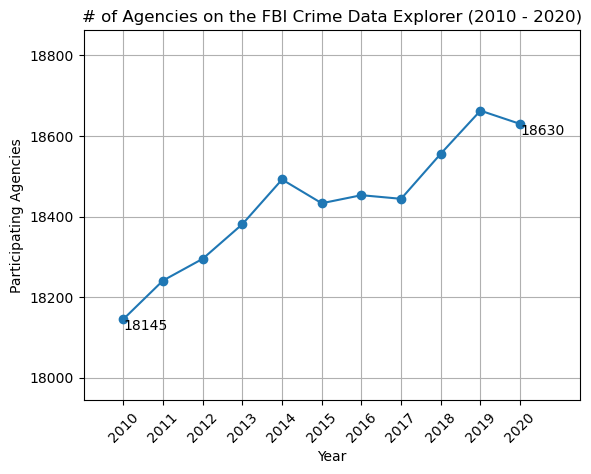

In [57]:
reporting_df = json_response2_df.groupby("data_year")["total_agency_count"].sum().reset_index()

plt.plot(reporting_df["data_year"], reporting_df["total_agency_count"], marker="o")

plt.title("# of Agencies on the FBI Crime Data Explorer (2010 - 2020)")
plt.xlabel("Year")
plt.ylabel("Participating Agencies")

plt.xticks(reporting_df["data_year"])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Labels are running together, only showing the first and last values
for i, (x, y) in enumerate(zip(reporting_df["data_year"], reporting_df["total_agency_count"])):
    if i == 0 or i == len(reporting_df["data_year"]) - 1: 
        plt.text(x, y, f'{y}', ha='left', va='top')

plt.ylim(min(reporting_df["total_agency_count"]) - 200, max(reporting_df["total_agency_count"]) + 200)
plt.xlim(min(reporting_df["data_year"]) - 1, max(reporting_df["data_year"]) + 1.5)

plt.grid(True)
plt.show()

In [59]:
pull_json3 = "./Resources/Law_Enforcement_employees.json"

json_response3_df = pd.read_json(pull_json3)
json_response3_df

data_year  population  agency_count_pe_submitting  male_officer_ct  \
0        2010   291519785                       13862           622432   
1        2011   302002906                       14489           636140   
2        2012   285534702                       13517           605315   
3        2013   269918333                       12644           567434   
4        2014   276219761                       12728           570021   
5        2015   296341200                       14535           603552   
6        2016   278868906                       12782           583127   
7        2017   282626440                       12655           589524   
8        2018   292030649                       13055           614756   
9        2019   292070813                       12808           620647   
10       2020   296181143                       12846           628994   

    male_civilian_ct  male_total_ct  female_officer_ct  female_civilian_ct  \
0             121036         743468              83170              187835   
1             121145         757285              97029              188674   
2             114219         719534              83576              173457   
3             108677         676111              75978              168054   
4             110690         680711              79786              165197   
5             118793         722345              81589              177488   
6             116616         699743              80779              175728   
7             113978         703502              84157              173555   
8             116765         731521              90050              177688   
9             123771         744418              92112              184895   
10            125881         754875              95676              188476   

    female_total_ct  officer_ct  civilian_ct  total_pe_ct  pe_ct_per_1000  
0            271005      705602       308871      1014473            3.48  
1            285703      733169       309819      1042988            3.45  
2            257033      688891       287676       976567            3.42  
3            244032      643412       276731       920143            3.41  
4            244983      649807       275887       925694            3.35  
5            259077      685141       296281       981422            3.31  
6            256507      663906       292344       956250            3.43  
7            257712      673681       287533       961214            3.40  
8            267738      704806       294453       999259            3.42  
9            277007      712759       308666      1021425            3.50  
10           284152      724670       314357      1039027            3.51

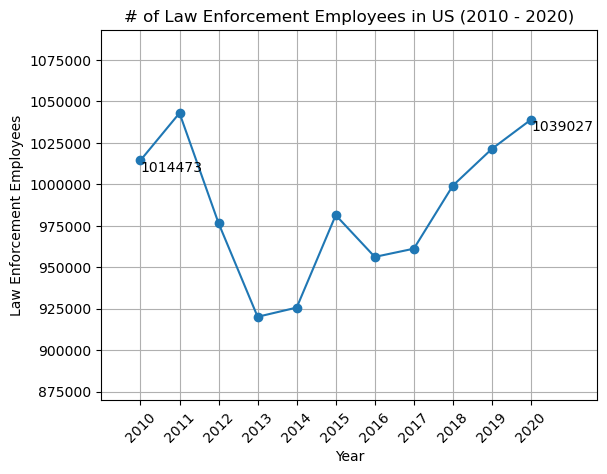

In [66]:
le_df = json_response3_df.groupby("data_year")["total_pe_ct"].sum().reset_index()

plt.plot(le_df["data_year"], le_df["total_pe_ct"], marker="o")

plt.title("# of Law Enforcement Employees in US (2010 - 2020)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Law Enforcement Employees")

plt.xticks(le_df["data_year"])
plt.ticklabel_format(style='plain', axis='y')

# Labels are running together, only showing the first and last values
for i, (x, y) in enumerate(zip(le_df["data_year"], le_df["total_pe_ct"])):
    if i == 0 or i == len(le_df["data_year"]) - 1: 
        plt.text(x, y, f'{y}', ha='left', va='top')

plt.ylim(min(le_df["total_pe_ct"]) - 50000, max(le_df["total_pe_ct"]) + 50000)
plt.xlim(min(le_df["data_year"]) - 1, max(le_df["data_year"]) + 1.7)

plt.grid(True)
plt.show()

In [1]:
le_data_list = []

for state_id in state_id_list:
    le_url = f"https://api.usa.gov/crime/fbi/cde/pe/state/{state_id}/byYearRange?from=2010&to=2010&API_KEY={fbi_cde_key}"
    le_response = requests.get(le_url).json()


    if isinstance(le_response, list):
        for data in le_response:
            data["state_abbr"] = "state_abbr"
            le_data_list.append(data)

NameError: name 'state_id_list' is not defined

In [84]:
json_data2 = json.dumps(le_data_list, indent=4)

file_path = "LE_Data_Raw_2010_2020.json"

with open(file_path,'w') as json_file:
    json_file.write(json_data2)

print(f"API response saved to {file_path}")

API response saved to LE_Data_Raw_2010_2020.json


In [85]:
pull_json4 = "LE_Data_Raw_2010_2020.json"

json_response4_df = pd.read_json(pull_json4)
json_response4_df

state_id            state_name state_abbr  data_year  population  \
0          2               Alabama         AL       2010     4642673   
1          1                Alaska         AK       2010      709674   
2          5               Arizona         AZ       2010     6303511   
3          3              Arkansas         AR       2010     2913748   
4          6            California         CA       2010    32100131   
5          7              Colorado         CO       2010     5026310   
6          8           Connecticut         CT       2010     3574097   
7         11              Delaware         DE       2010      897553   
8         10  District of Columbia         DC       2010      601723   
9         12               Florida         FL       2010    17877295   
10        13               Georgia         GA       2010     8602933   
11        15                Hawaii         HI       2010     1360301   
12        17                 Idaho         ID       2010     1565040   
13        18              Illinois         IL       2010    12731036   
14        19               Indiana         IN       2010     5863893   
15        16                  Iowa         IA       2010     3038829   
16        20                Kansas         KS       2010     2603837   
17        21              Kentucky         KY       2010     4100906   
18        22             Louisiana         LA       2010     3415372   
19        25                 Maine         ME       2010     1327845   
20        24              Maryland         MD       2010     5601957   
21        23         Massachusetts         MA       2010     6495084   
22        26              Michigan         MI       2010     9862214   
23        27             Minnesota         MN       2010     5222804   
24        29           Mississippi         MS       2010     2792018   
25        28              Missouri         MO       2010     5881656   
26        30               Montana         MT       2010      988498   
27        31              Nebraska         NE       2010     1779289   
28        37                Nevada         NV       2010     2700551   
29        34         New Hampshire         NH       2010     1190812   
30        35            New Jersey         NJ       2010     8498222   
31        36            New Mexico         NM       2010     2007146   
32        38              New York         NY       2010    19193396   
33        32        North Carolina         NC       2010     9530965   
34        33          North Dakota         ND       2010      668124   
35        39                  Ohio         OH       2010     9343250   
36        40              Oklahoma         OK       2010     3749467   
37        41                Oregon         OR       2010     3794266   
38        42          Pennsylvania         PA       2010     9629088   
39        44          Rhode Island         RI       2010     1052567   
40        45        South Carolina         SC       2010     4219475   
41        46          South Dakota         SD       2010      812042   
42        47             Tennessee         TN       2010     6341178   
43        48                 Texas         TX       2010    25000995   
44        49                  Utah         UT       2010     2763885   
45        52               Vermont         VT       2010      365893   
46        50   U.S. Virgin Islands         VI       2010           0   
47        51              Virginia         VA       2010     7998415   
48        53            Washington         WA       2010     6708530   
49        55         West Virginia         WV       2010     1840678   
50        54             Wisconsin         WI       2010     5671177   
51        56               Wyoming         WY       2010      559436   

    agency_count_pe_submitting  male_officer_ct  male_civilian_ct  \
0                          318            10134              2016   
1                           34             1116  